In [53]:
!pip install librosa
!pip install IPython
!pip install keras
# !pip install pickle
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as audio
import warnings
from IPython.display import Audio
import time
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Dropout
import math
from keras.callbacks import ModelCheckpoint
# import pickle
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Loading the data set
For this problem, I have worked with TESS(Toronto emotional speech set), as I wasn't able to find a mp3 dataset for training of the model. The list LABELS contains all  the labels that are present in the dataset.

In [54]:
# DATASET = "Crema/"
DATASET = "TESS/"

# LABELS = ['sadness', 'angry', 'disgust', 'fear', 'happy', 'neutral']
# labels1 = ['SAD','ANG','DIS','FEA','HAP','NEU']
LABELS = []
labels1 = []
for file in os.listdir(DATASET):
    filename = file.split('_')[1].split()[0]
    if filename.lower() not in LABELS:
        LABELS.append(filename.lower())
    if filename not in labels1:
        labels1.append(filename)    

PATHS = []
for file in os.listdir(DATASET):
    for f in os.listdir(os.path.join(DATASET, file)):
        PATHS.append(os.path.join(DATASET, file, f))

print(LABELS)
print(labels1)
# PATHS

['angry', 'disgust', 'fear', 'happy', 'neutral', 'pleasant', 'sad']
['angry', 'disgust', 'Fear', 'happy', 'neutral', 'Pleasant', 'Sad', 'fear', 'pleasant', 'sad']


## Stats
This bar graph represents the number of data points present in each label.

Text(0.5, 1.0, 'TESS Class distribution')

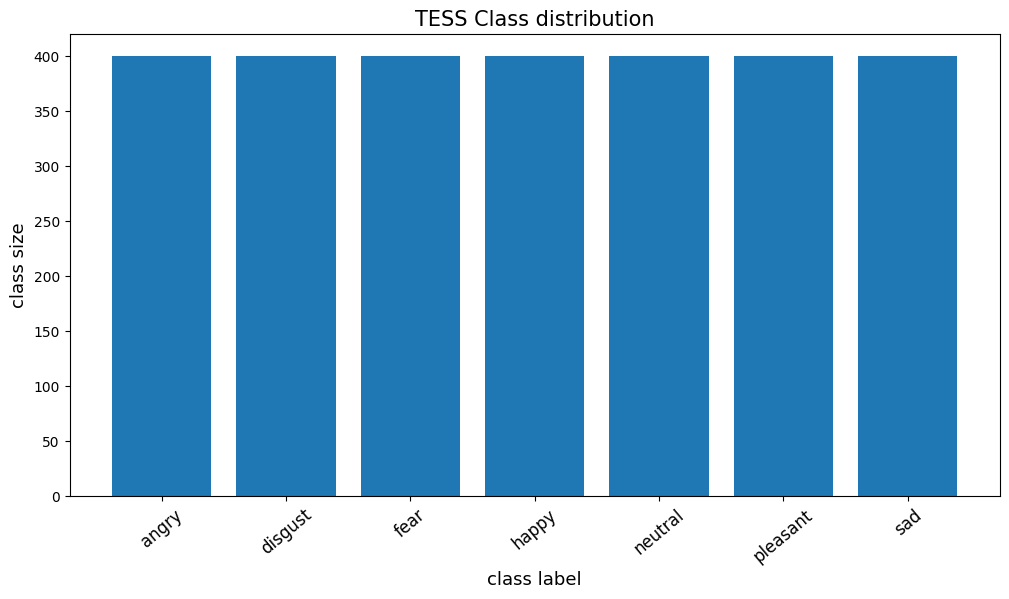

In [55]:
counts = {}

for file in os.listdir(DATASET):
    for label in LABELS:
        if label in file or (label[0].upper() + label[1:]) in file:
            if label not in counts.keys():
                counts[label] = 0
            counts[label] += len(os.listdir(os.path.join(DATASET, file)))
            # counts[label] += 1
    # PATHS.append(os.path.join(DATASET, file))

plt.figure(figsize=(12,6))

plt.bar(range(len(counts)), list(counts.values()), align='center')
plt.xticks(range(len(counts)), list(counts.keys()), fontsize=12, rotation=40)
plt.xlabel('class label', fontsize=13)
plt.ylabel('class size', fontsize=13)
plt.title('TESS Class distribution', fontsize=15)

## Creating the dataframe

In [56]:
df = pd.DataFrame()
df['paths'] = PATHS
# labels1 = []
labels2 = []
for i in range(len(PATHS)):
    labels2.append(PATHS[i].split('/')[1].split('\\')[0].split('_')[1].split()[0].lower())
# for i in range(len(PATHS)):
#     for j in range(len(labels1)):
#         if labels1[j] in PATHS[i]:
#             labels2.append(LABELS[j])
#             break
df['labels'] = labels2

df

,paths,labels
0,TESS/OAF_angry\OAF_back_angry.wav,angry
1,TESS/OAF_angry\OAF_bar_angry.wav,angry
2,TESS/OAF_angry\OAF_base_angry.wav,angry
3,TESS/OAF_angry\OAF_bath_angry.wav,angry
4,TESS/OAF_angry\OAF_bean_angry.wav,angry
...,...,...
2795,TESS/YAF_sad\YAF_witch_sad.wav,sad
2796,TESS/YAF_sad\YAF_yearn_sad.wav,sad
2797,TESS/YAF_sad\YAF_yes_sad.wav,sad
2798,TESS/YAF_sad\YAF_young_sad.wav,sad


In [57]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    # plt.show()

def spectrogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr,x_axis='time', y_axis='hz')
    plt.colorbar()

## Further Stats
I have plotted the waveplot and the spectrogram for all types of speeches available. As we can observe they are quite distinct and easily distinguishable

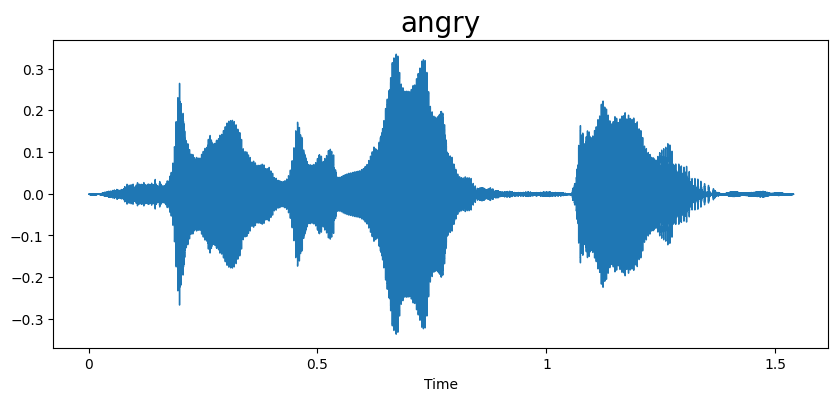

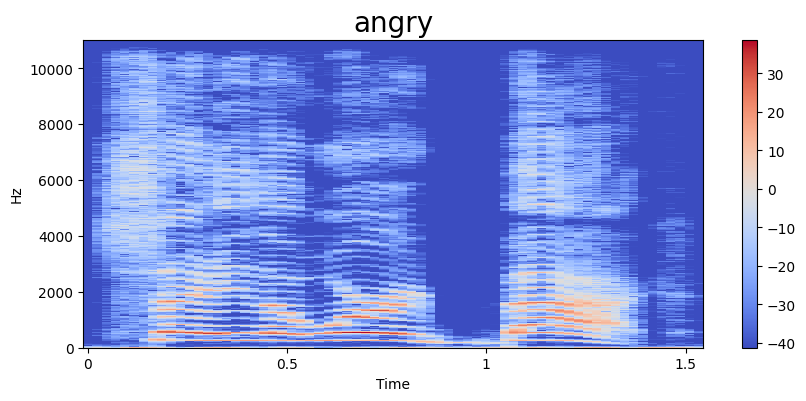

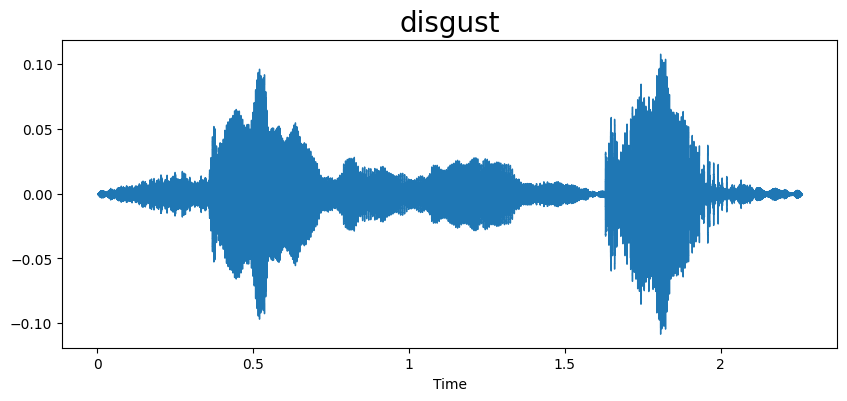

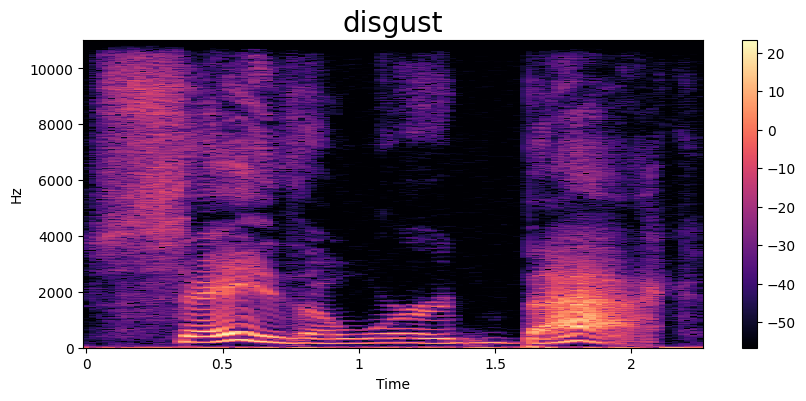

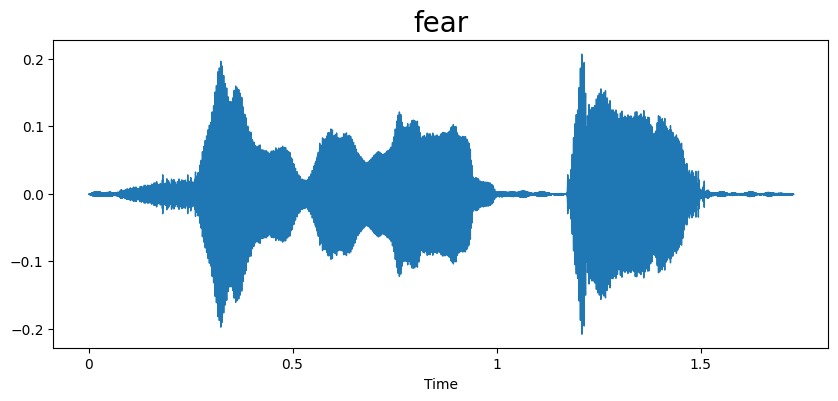

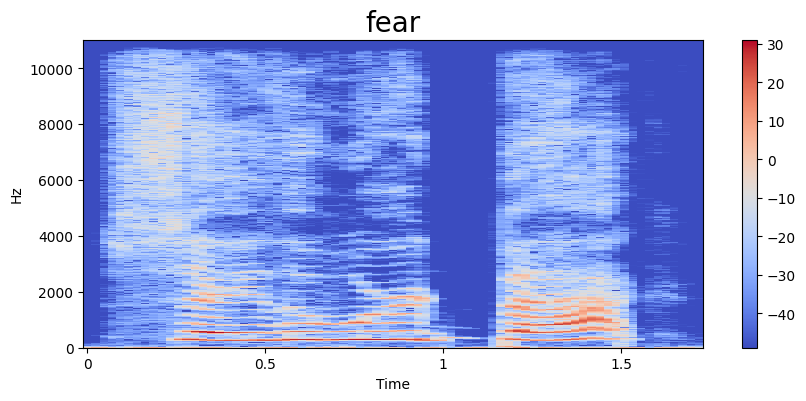

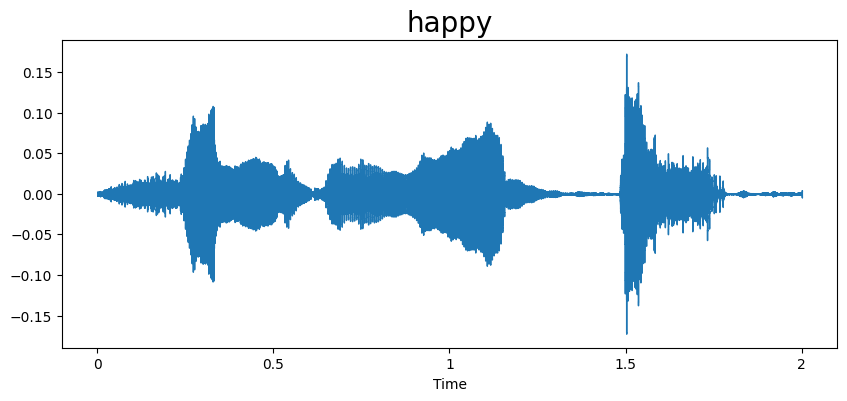

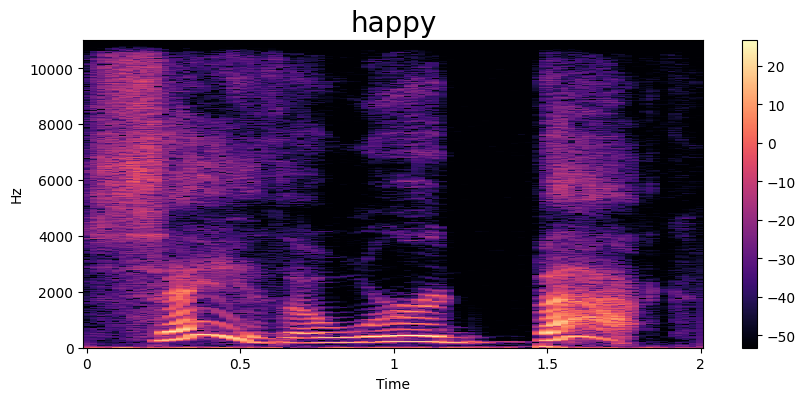

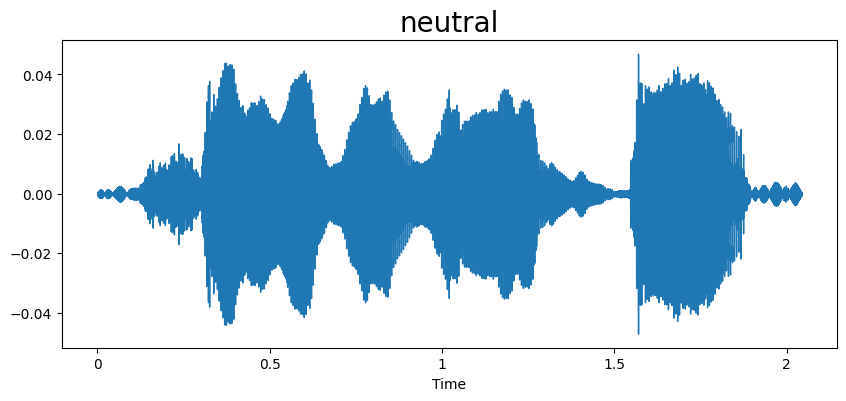

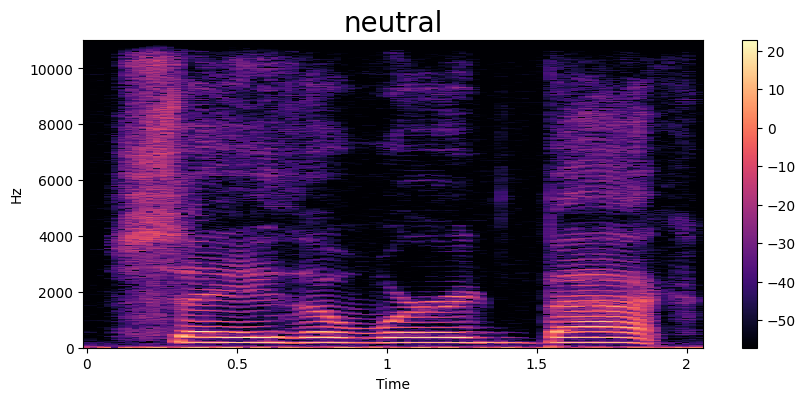

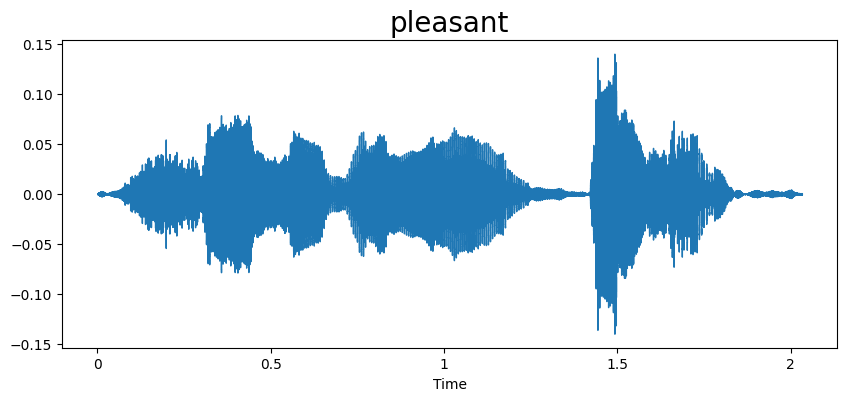

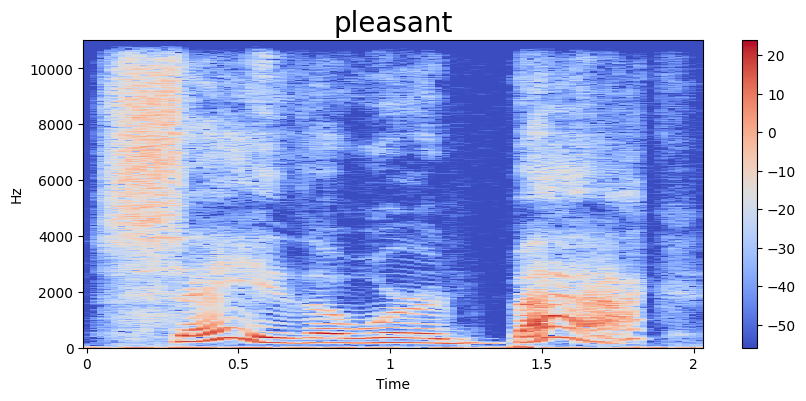

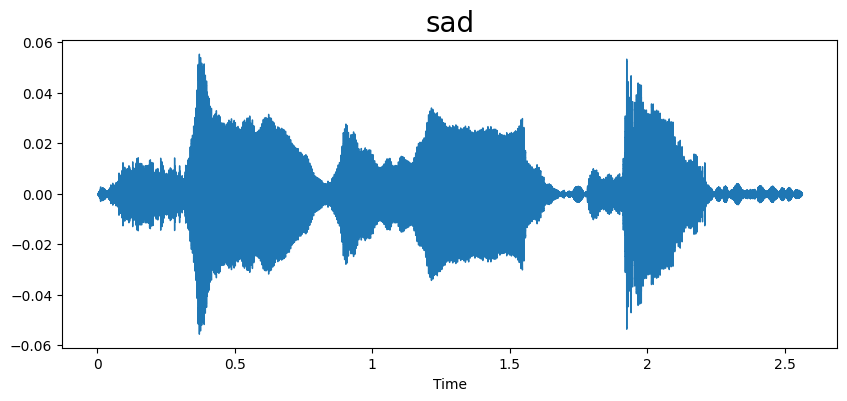

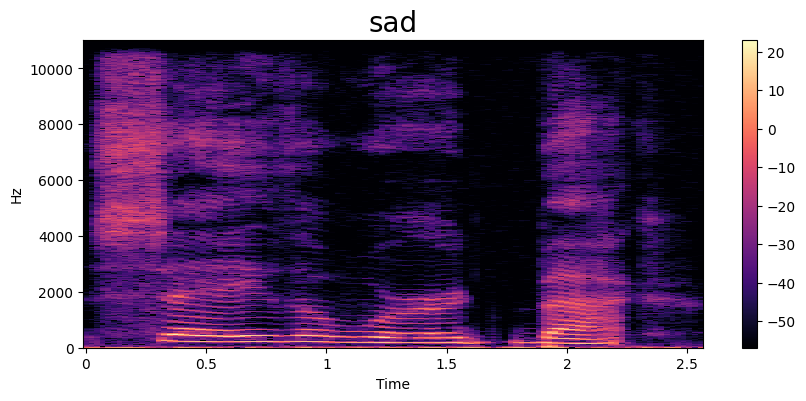

In [58]:
for emotion in LABELS:
# emotion = 'angry'
    path = np.array(df['paths'][df['labels'] == emotion])[0]
    # Audio(path)
    data, samplig_rate = librosa.load(path)
    waveplot(data, samplig_rate, emotion)
    spectrogram(data, samplig_rate, emotion)

In [59]:
def extract_feature(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc
    # return librosa.feature.mfcc(y=y, sr=sr)

In [60]:
extract_feature(df['paths'][0])

array([-3.9698621e+02,  7.7440536e+01, -1.9592791e+01, -2.1666689e+01,
       -2.1127551e+00,  1.0075363e+01, -2.0366707e+01, -6.0924492e+00,
       -7.2122831e+00, -5.5736589e-01, -1.8325536e+00,  2.0210151e-01,
        7.2755092e-01,  1.3177378e+00,  2.8863375e+00,  2.8557916e+00,
       -4.7129216e+00, -4.4365106e+00, -1.6211593e+00, -1.0239839e+01,
       -7.5512629e+00, -1.7968802e+00, -7.0376520e+00,  9.4365845e+00,
        8.3558540e+00,  2.1712360e+01,  1.9216991e+01,  2.0348927e+01,
        1.3413366e+01,  8.3391714e+00,  3.9472267e-01,  5.1113143e+00,
        9.5687389e+00,  5.4548678e+00,  2.5099638e+00, -1.8239071e+00,
        4.8689628e+00,  9.3139229e+00,  2.0891502e+00, -1.9064913e+00],
      dtype=float32)

### Extracting the features from all the speech files to get a numerical dataset of the speeches.

In [61]:
X_mfcc = df['paths'].apply(lambda x: extract_feature(x))

In [62]:
X_mfcc

0       [-396.9862, 77.44054, -19.59279, -21.666689, -...
1       [-465.73267, 98.77373, 0.6560091, -32.74544, -...
2       [-429.79196, 46.124, 1.5550474, -0.21709543, 2...
3       [-403.46118, 76.3237, -12.531774, -22.288858, ...
4       [-434.05756, 77.4455, 10.8655, 16.092943, 8.04...
                              ...                        
2795    [-406.48053, 80.379875, 32.462395, 46.579094, ...
2796    [-426.90918, 102.54757, 24.800041, 43.04809, 4...
2797    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
2798    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
2799    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: paths, Length: 2800, dtype: object

In [63]:
X = [x for x in X_mfcc]
X = np.asarray(X)
X = np.expand_dims(X,-1)
X.shape

(2800, 40, 1)

In [64]:
enc = OneHotEncoder()
y = (enc.fit_transform(df[['labels']])).toarray()

In [65]:
y.shape
# y[1000]

(2800, 7)

## Creating the model
For the problem, i have chosen a LTSM model which accepts an input of size 40x1 and gives an output of size 1x7

In [46]:
model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    # Dense(128, activation='relu'),
    # Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.save('model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 455       
                                                                 
Total params: 305,799
Trainable params: 305,799
Non-trai

### Checkpoint
I have created a checkpoint callback, in order to save the model when the model has highest validation accuracy

In [47]:
checkpoint_callback = ModelCheckpoint(
    filepath='model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

### Training the model with a 20% split

In [48]:
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64, callbacks=[checkpoint_callback])

Epoch 1/50
35/35 [==============================] - ETA: 0s - loss: 1.1320 - accuracy: 0.5821
Epoch 1: val_accuracy improved from -inf to 0.31786, saving model to model.h5
35/35 [==============================] - 4s 82ms/step - loss: 1.1320 - accuracy: 0.5821 - val_loss: 2.4748 - val_accuracy: 0.3179
Epoch 2/50
35/35 [==============================] - ETA: 0s - loss: 0.4888 - accuracy: 0.8192
Epoch 2: val_accuracy improved from 0.31786 to 0.48036, saving model to model.h5
35/35 [==============================] - 2s 68ms/step - loss: 0.4888 - accuracy: 0.8192 - val_loss: 2.1243 - val_accuracy: 0.4804
Epoch 3/50
35/35 [==============================] - ETA: 0s - loss: 0.2241 - accuracy: 0.9312
Epoch 3: val_accuracy improved from 0.48036 to 0.68750, saving model to model.h5
35/35 [==============================] - 2s 70ms/step - loss: 0.2241 - accuracy: 0.9312 - val_loss: 1.3755 - val_accuracy: 0.6875
Epoch 4/50
35/35 [==============================] - ETA: 0s - loss: 0.2107 - accuracy: 0

In [49]:
epochs = range(100)
acc = np.asarray(history.history['accuracy'])
val_acc = np.asarray(history.history['val_accuracy'])
print(f"The accuracy of the model is {acc[val_acc.argmax()]} with validation accuracy is {val_acc.max()}")

The accuracy of the model is 0.9950892925262451 with validation accuracy is 0.7553571462631226


## Accuracy plots

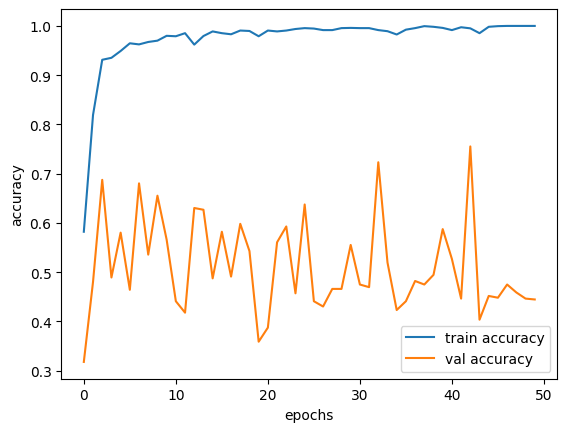

In [50]:
plt.plot(range(len(acc)), acc, label='train accuracy')
plt.plot(range(len(val_acc)), val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

## Applying it on a mp3 audio track
We can load the model and apply it on a mp3 audio track which has e=been divided into segments of size 3 seconds. Now these segments are fitted into the model and we get the predicted label of each segment. As we can see, the audio file has 2 emotions, disgust and angry and we can also check the timestamps of each emotion.

In [66]:
model = load_model('model.h5')
aud, sr = librosa.load('harvard.mp3')

duration = 3
samples_per_segment = math.floor(duration*sr)

segments = []
for i, start_sample in enumerate(range(0, len(aud), samples_per_segment)):
    segments.append(aud[start_sample:start_sample+samples_per_segment])

emotions = []
for segment in segments:
    mfcc = np.mean(librosa.feature.mfcc(y=segment, sr=sr, n_mfcc=40).T, axis=0)
    X = [x for x in mfcc]
    X = np.asarray(X)
    X = np.expand_dims(X,-1)
    X = np.expand_dims(X,0)
    # print(X.shape)
    y_pred = model.predict(X)
    # y_pred = np.array(y_pred)
    # y_pred = np.argmax(y_pred)
    # print(y_pred.shape)
    y_pred = enc.inverse_transform(y_pred)
    emotions.append(y_pred)
emotions = np.asarray(emotions)
emotions = emotions.reshape(-1)

1/1 [==============================] - 0s 18ms/step


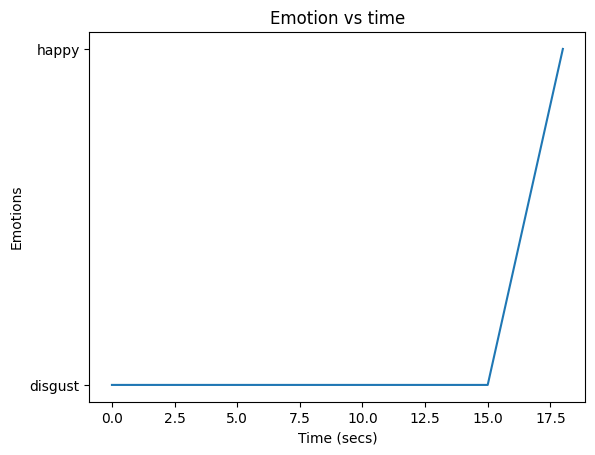

In [67]:
plt.plot(range(0, 19,  math.ceil(samples_per_segment*18/len(aud))), emotions)
plt.xlabel('Time (secs)')
plt.ylabel('Emotions')
plt.title('Emotion vs time')
plt.show()